<a href="https://colab.research.google.com/github/Emueni22/Financial-Inclusion-IP/blob/main/Financial_Inclusion_IP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**FINANCIAL INCLUSION IN EAST AFRICA**



***a) Introduction Context***

Financial Inclusion remains one of the main obstacles to economic and human development in Africa.

Traditionally, access to bank accounts has been regarded as an indicator of financial inclusion. For example, across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 13.9% of the adult population) have access to or use a commercial bank account, showing that a majority of the population does not have access to a lot of financial services which can greatly impact their financial outcomes.

The research problem is to figure out how we can predict which individuals are most likely to have or use a bank account and provide insights into some of the key demographic factors that might drive individuals’ financial outcomes.

**(b) Specifying the analytics questions**

**Main Question**

 To figure out some of the key demographic factors that might drive individuals’ financial outcomes (1.e, to have a bank account in this case).

**Other Research Questions**

1. Does age affect the financial inclusitivity of an individual?
2. Are people in Rural areas more disadvantaged than people in Urban areas?
3. Does the Country have an effect on Financial Inclusion?
4. Are cell phone users likely to have a bank account?
5. Are more employed people likely to have bank accounts compared to the unemployed?

**(c) Defining the Metric of Success**

1.  The research will be defined a succes when we will be able to find the key demographic factors that drive individuals' financial outcome.

2.  Come up with recommendations to improve financial inclusitivity in East Africa.

**(d) Understanding the Context**

Financial inclusion in this context means that individuals have and are able to utilize bank accounts. Access to banks is a huge indicator of financial inclusion.

The dataset used in the analysis contains records of individuals from four Eastern Africa countries i.e.Kenya, Uganda, Tanzania and Rwanda between 2016 and 2018. Some of the information in the dataset include gender, occupation, age, location, and marital status of the individual and whether the individual had a bank account at the time the data was collected. The data was sourced from various surveys that are available online.

Being able to tell individuals most likely to have a bank account will allow for a more efficient reach and focusing by financial instituions.

**(e) The Experimental design outline**

  1. Loading the required libraries.
  2. Loading the data set.
  3. Check the data ( data types, shape, description)
  4. Data prepration (Handling missing data and anormalies)
  5. Data validation
  6. Perform EDA (Univariate, Bivariate and Multivariate analysis) 
  7. Implement the solution by performing PCA.
  8. Drawing conclusion and recommendation.







In [67]:
# Loading the libraries to be used
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt # for visualizations
import seaborn as sns # for visualizations

# Filter warnings
import warnings
warnings.filterwarnings('ignore')


In [68]:
# Loading the data set

url = 'https://bit.ly/FinancialDataset'

df = pd.read_csv(url)

**CHECKING THE DATA**

In [69]:
 # Chekcking the top rows

 df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [70]:
# Checing the bottom rows

df.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [71]:
# Checking the shape of our data set.

df.shape

(23524, 13)

This data set has 23524 columns and 13 rows


In [72]:
# Looking for the column informations of the entire data set and the data types for the columns.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


From financial inclusion data set, ten(10) columns have object data typeand three(3) columns are intergers/float.
Since there are some null values we need to look for them.

In [73]:
# Checking the number of unique records in each column

df.nunique()

country                      4
year                         6
uniqueid                  8735
Has a Bank account           2
Type of Location             2
Cell Phone Access            2
household_size              21
Respondent Age              85
gender_of_respondent         2
The relathip with head       6
marital_status               5
Level of Educuation          7
Type of Job                 10
dtype: int64

In [74]:
# checking the stafics for the numerical variables

df.describe()

,year,household_size,Respondent Age
count,23524.000000,23496.000000,23490.000000
mean,2016.979000,3.681818,38.804300
std,0.899669,2.279933,16.519996
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000


Our data set has 3 numerical columns ( year, household size and age of respondent). The description above shows the number of surveys we are working with, then mean, standard deviation, min and max and the quartile mathematical analysis for theis columns.

**DATA VALIDATION**

***Data Cleaning***



In [75]:
# To understand what each variable has we load the variable definations dataset.

url = 'https://bit.ly/VariableDefinitions'

variables = pd.read_csv (url)
variables.rename(columns={"Variable Definitions": "variable", "Unnamed: 1": "Definitions"})


,variable,Definitions
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


In [76]:
# Renaming the colums for simpler understanding and uniformity.

df = df.rename(columns={"Type of Location": "location_type", "Cell Phone Access": "cellphone_access", "Respondent Age": "age_of_respondent", "The relathip with head": "relationship_with_head", "Level of Educuation": "education_level", "Type of Job": "job_type","Has a Bank account": "has_bank_account"})

df.head()

,country,year,uniqueid,has_bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [77]:
# Checking for duplicates

df.duplicated().any()

False

**Missing Values**

In [78]:
# checking for null values

df.isnull().sum()

country                   14
year                       0
uniqueid                   0
has_bank_account          36
location_type             15
cellphone_access          11
household_size            28
age_of_respondent         34
gender_of_respondent      34
relationship_with_head     4
marital_status            32
education_level           29
job_type                  30
dtype: int64

Since we are working with a questionnaire and we can't assume an individuals i nformation, we drop rows with any missing values and term the questionnaire as incomplete.

In [79]:
# Checking for the rows with any missing data 

df1 = df[df.isnull().any(axis=1)]
df1.shape

(181, 13)

In [80]:
# Dropping the rows with any missing data

df = df.dropna()
df.shape

(23343, 13)

In [81]:
# Checking the remaining data after dropping rows with missing data to confirm there are no nulll values.

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23343 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23343 non-null  object 
 1   year                    23343 non-null  int64  
 2   uniqueid                23343 non-null  object 
 3   has_bank_account        23343 non-null  object 
 4   location_type           23343 non-null  object 
 5   cellphone_access        23343 non-null  object 
 6   household_size          23343 non-null  float64
 7   age_of_respondent       23343 non-null  float64
 8   gender_of_respondent    23343 non-null  object 
 9   relationship_with_head  23343 non-null  object 
 10  marital_status          23343 non-null  object 
 11  education_level         23343 non-null  object 
 12  job_type                23343 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.5+ MB


**Outliers**

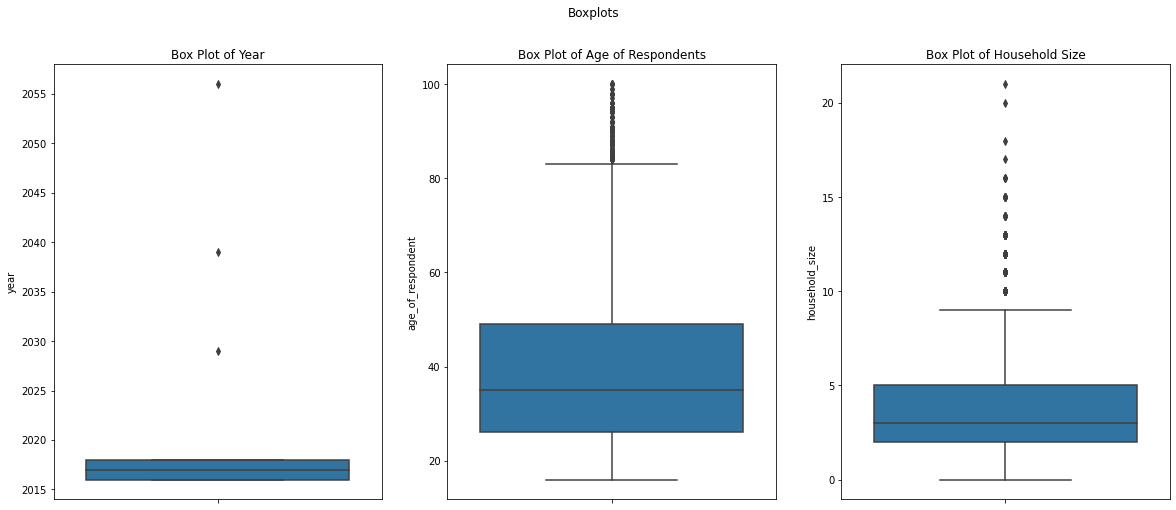

In [82]:
# Checking for Outliers

fig, ax = plt.subplots(1,3, figsize=(20,8))
fig.suptitle('Boxplots')
sns.boxplot(data= df, y = "year", ax=ax[0])
ax[0].set_title('Box Plot of Year')
sns.boxplot(data= df, y = "age_of_respondent", ax=ax[1])
ax[1].set_title('Box Plot of Age of Respondents')
sns.boxplot(data= df, y = "household_size", ax=ax[2])
ax[2].set_title('Box Plot of Household Size')

plt.show()

The plots below show that we have three outliers in the 'year' variable,
Eleven outliers in 'household size' variable and multiple outliers in the 'age' variable.

After seeing that the outlier ages are 89 - 100, we accept the data since this are all plausible ages.

***Handling anormalies***

From our data set we see that the maximum year is 2056, and since we're yet to be reach that year, we consider this as an anomaly and investigate more on the year column.
We handle this by: 

*   Checking the year column values
*   Dropping the years that seem to be anormalies.
*  Confirming by checking the year column values again.





In [83]:
# Checking for Anomalies
# 'year' variable

q1_year = df['year'].quantile(.25)
q3_year = df['year'].quantile(.75)

iqr_year = q3_year - q1_year

print(iqr_year) 

2.0


The results show that 'year' has 2 records that are not within the middle 50% of the records in that column

In [84]:
# Cheking on the year column values

df.year.value_counts()


2016    8683
2018    8157
2017    6500
2029       1
2056       1
2039       1
Name: year, dtype: int64

In [85]:
# Dropping rows containing anormalies

#df.drop(df[(df['year'] == 2056) & (df['year'] == 2039) & (df['year'] == 2029)].index, inplace=True)
#df.query('year > 2018')

df = df.drop(df.index[[213,308,7014]])


In [86]:
# Confirming by checking the year column values again..

print (df["year"].value_counts())
df.shape

2016    8682
2018    8157
2017    6500
2039       1
Name: year, dtype: int64


(23340, 13)

**EXPLORATORY DATA ANALYSIS**

**Univariate Analysis**

The main purpose of univariate analysis is to describe the data and find patterns that exist within it.

Visualization methods used are Histograms and Boxplot
For categorical variables,frequency table usually used to understand distribution of each category. We can also read as percentage of values under each category. 


In [87]:
df.columns

Index(['country', 'year', 'uniqueid', 'has_bank_account', 'location_type',
       'cellphone_access', 'household_size', 'age_of_respondent',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type'],
      dtype='object')

** Central Tendancy Measures**

In [88]:
# checking the mean, mode and median of ages in the dataset

mean_age = df['age_of_respondent'].mean()
median_age = df['age_of_respondent'].median()
mode_age = df['age_of_respondent'].mode()
print(mean_age, median_age, mode_age)

print('\n')

mean_hsize = df['household_size'].mean()
median_hsize = df['household_size'].median()
mode_hsize = df['household_size'].mode()
print(mean_hsize, median_hsize, mode_hsize)


38.807412167952016 35.0 0    30.0
dtype: float64


3.6883461868037704 3.0 0    2.0
dtype: float64


In [89]:
age_std = df['age_of_respondent'].std()
age_var = df['age_of_respondent'].var()

print('Standard Deviation of Age variable is ' + str(age_std))
print('Variance of Age variable is ' + str(age_var))

Standard Deviation of Age variable is 16.519514325736242
Variance of Age variable is 272.8943535582049


In [90]:
#Evaluating skewness and kurtosis of our data set

print(f"Age Skewness is: {df['age_of_respondent'].skew()}")
print(f"Age Kurtosis is: {df['age_of_respondent'].kurt()}")

print ("\n" )

print(f"Household size Skewness is: {df['household_size'].skew()}")
print(f"Household size Kurtosis is: {df['household_size'].kurt()}")



Age Skewness is: 0.8406938104193382
Age Kurtosis is: 0.09836304279020869


Household size Skewness is: 0.9743919573517608
Household size Kurtosis is: 1.1548946547781336


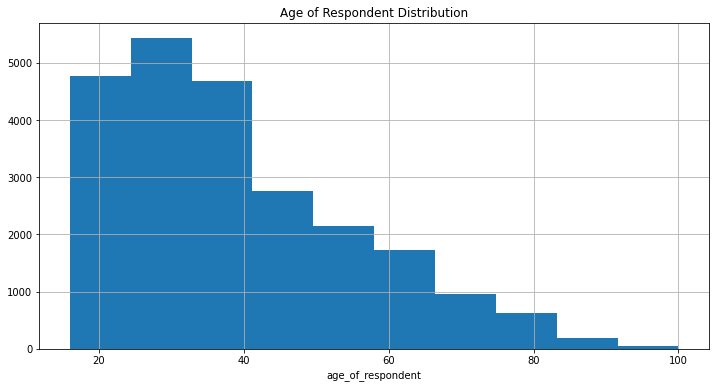

In [91]:
# Exploring age distribution using histogram

plt.figure(figsize=(12,6))
df.age_of_respondent.hist() 
plt.title("Age of Respondent Distribution")
plt.xlabel('age_of_respondent')
plt.show()

The majority of respondents from our dataset are between 20 - 40 years old, the maximum age is 100 and minimum of 16 years old

2016    8682
2018    8157
2017    6500
2039       1
Name: year, dtype: int64

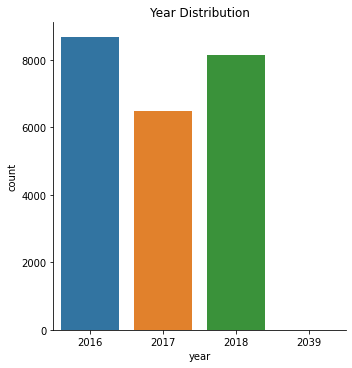

In [92]:
# Cheking years financial inclusitivity using a catplot.

sns.catplot(x="year", kind="count", data=df)
plt.title("Year Distribution")

df.year.value_counts()

2016 had the highest Count of Financial Inclusitivity, followed by 2018 and lastly 2017. Meaning a high number of the surveyed individuals had accounts in 2016.

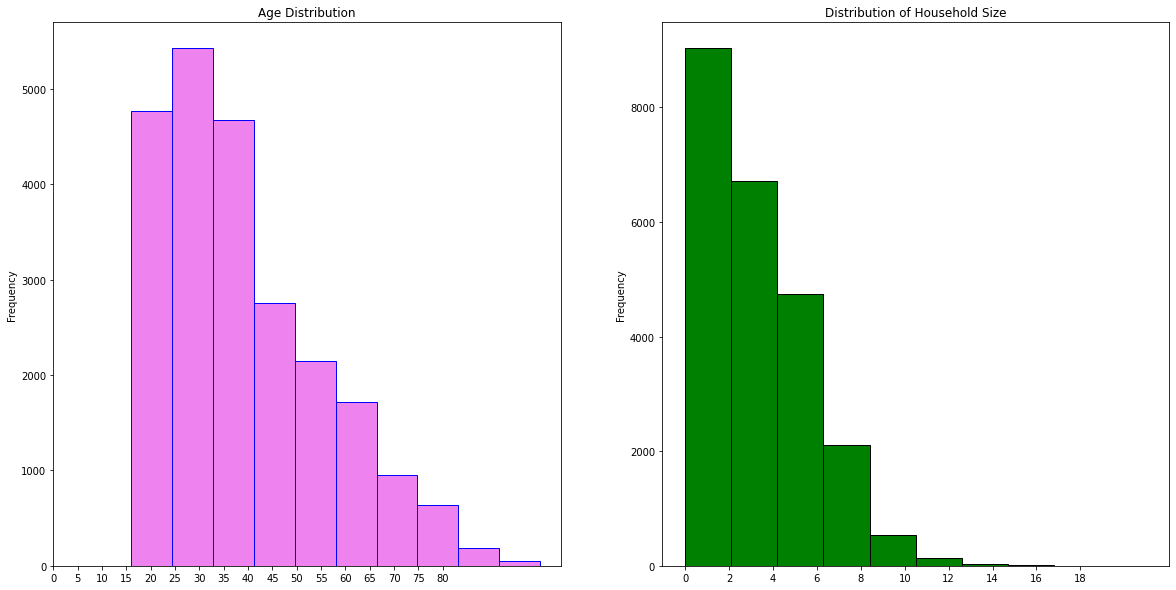

In [93]:
# Plotting an hiotogfram to show distribution of age and household size in the dataset

fig,ax=plt.subplots(1,2,figsize=(20,10))
df['age_of_respondent'].plot.hist(ax=ax[0],bins=10,edgecolor='blue',color='violet')
ax[0].set_title('Age Distribution')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)

df['household_size'].plot.hist(ax=ax[1],color='green',bins=10,edgecolor='black')
ax[1].set_title('Distribution of Household Size')
x2=list(range(0,20,2))
ax[1].set_xticks(x2)
plt.show()

Using hist plots to show the count of diffrent categories in the variables we are monitoring.
Individuals leaving in household of 0-5 were reported to be more inclusive. 

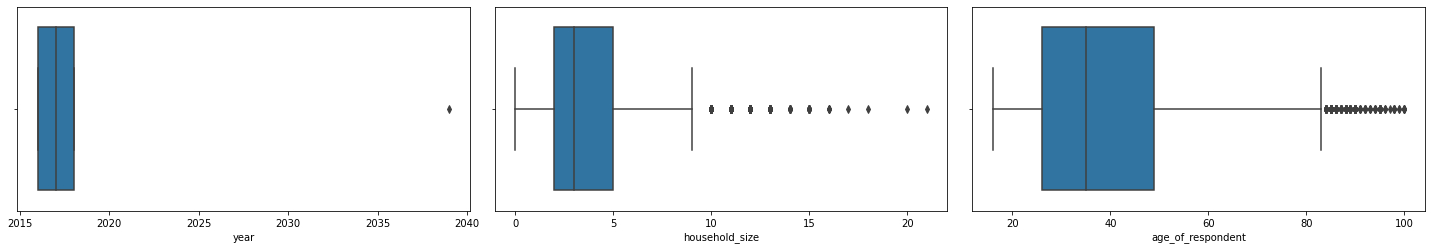

In [94]:
# Creating Box plots for all the numeric data.

cols = 3
rows = 3
num_cols = df.select_dtypes(exclude='object').columns
fig = plt.figure(figsize= (20,10))
for i, col in enumerate(num_cols):
    
    ax=fig.add_subplot( rows, cols, i+1)
    
    sns.boxplot(x=df[col], ax=ax)
    
fig.tight_layout()  
plt.show()

An Outrlier for household size is notable.
ANother outlier for age of respondent is all noted.
Since this is individual information and cant be changed as it represents the true picture , we do nothing with the outliers.


In [95]:
# Describe the categorical data in our data set

df.describe(include='object')




,country,uniqueid,has_bank_account,location_type,cellphone_access,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
count,23340,23340,23340,23340,23340,23340,23340,23340,23340,23340
unique,4,8687,2,2,2,2,6,5,7,10
top,Rwanda,uniqueid_1,No,Rural,Yes,Female,Head of Household,Married/Living together,Primary education,Self employed
freq,8683,4,20044,14263,17332,13766,12729,10699,12689,6361


In [96]:
# Creating a data frame for all the categotical data
cat_data = df.select_dtypes(include='object')
cat_data.columns

Index(['country', 'uniqueid', 'has_bank_account', 'location_type',
       'cellphone_access', 'gender_of_respondent', 'relationship_with_head',
       'marital_status', 'education_level', 'job_type'],
      dtype='object')

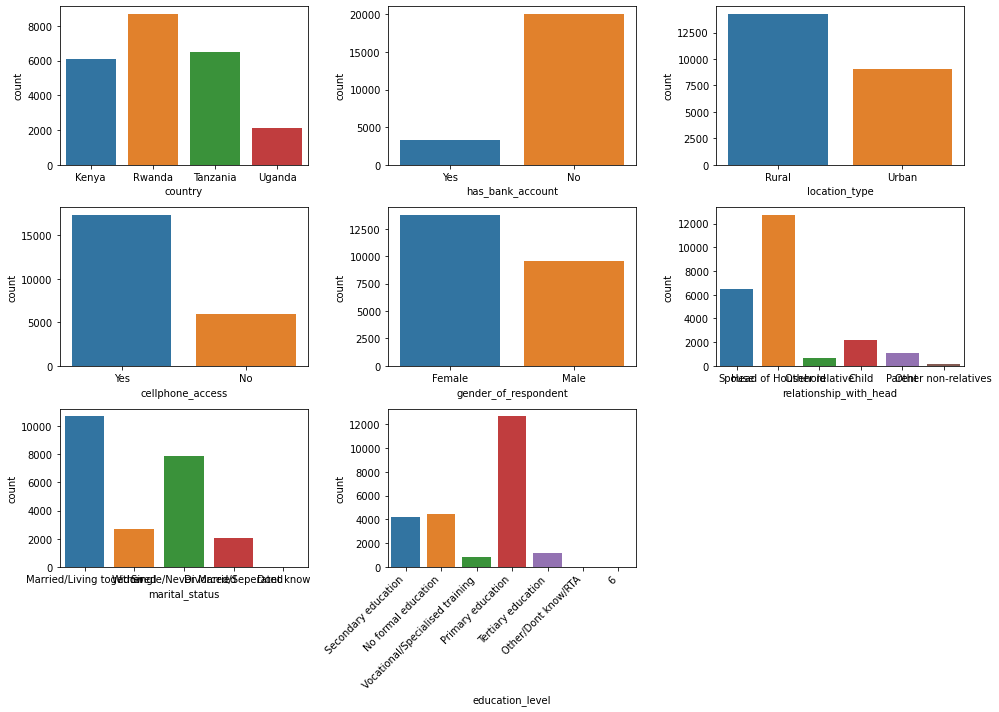

In [97]:
# Creating count plots for the catogorical data.

cols = 4
rows = 1
diag = plt.figure(figsize= (14,10))
cat_cols = cat_data.columns[cat_data.nunique() < 10]
for i, col in enumerate(cat_cols):
  ax= diag.add_subplot( 3, 3, i+1)

  sns.countplot(x=df[col], ax=ax)
    
plt.xticks(rotation=45, ha='right')
    
diag.tight_layout()  
plt.show()


Since job category has the highest category number of 10. I used loop to create count plots for the categorical features with unique classes less than 1o

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

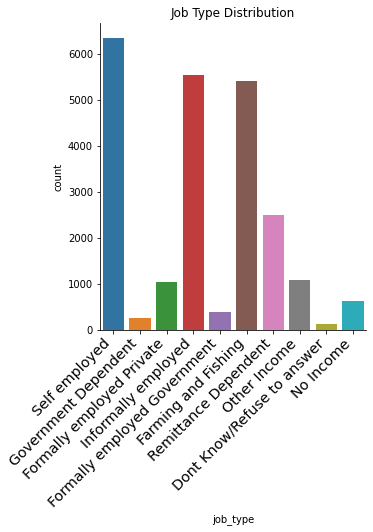

In [98]:
# Let's explore the distribution of Job Type using count

sns.catplot(x="job_type", kind="count", data=df)
plt.title("Job Type Distribution")

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large' 
)

Female    13766
Male       9574
Name: gender_of_respondent, dtype: int64


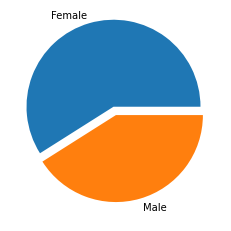

In [99]:
 # Using a  pie chart to check financial inclusitivity in gender

 Values = df['gender_of_respondent'].value_counts()
 Labels = df['gender_of_respondent'].unique().tolist()
 explode = (0.1, 0)

 plt.pie(Values, labels = Labels, explode = explode, radius = 1)

 plt.show
 print(Values)

Our data set has 13767 females and 9576 Men


**BIVARIATE ANALYSIS**

Will use the ‘has_bank_account ’ column of the data as the categorical variable for our analysis. Comparing the column ‘has_bank_account’ column with other columns can provide us with some useful insights.
We need to check whether females are likely to have bank accounts as opposed to males or whether individuals in urban areas are more likely to use commercial banks compared to those in rural areas. By doing this we can deduce the characteristics unique to persons likely to have bank accounts.


In [100]:
# Calculating correlation between continous variables.

df[['household_size', 'age_of_respondent']].corr()

,household_size,age_of_respondent
household_size,1.00000,-0.11956
age_of_respondent,-0.11956,1.00000


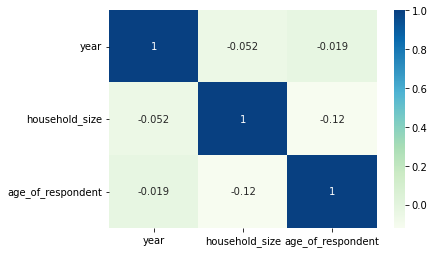

In [101]:
# Plot the correlation heatmap

sns.heatmap(df.corr(), cmap="GnBu", annot=True);

In this data set there isn't any strong correlation between the two continous variables.

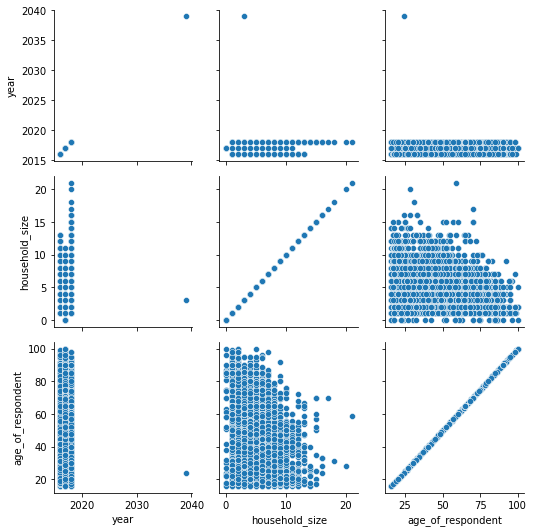

In [102]:
# Drawing a scatterplots to see a relation between the continuous variables.

grid = sns.PairGrid(df)
grid.map(sns.scatterplot)


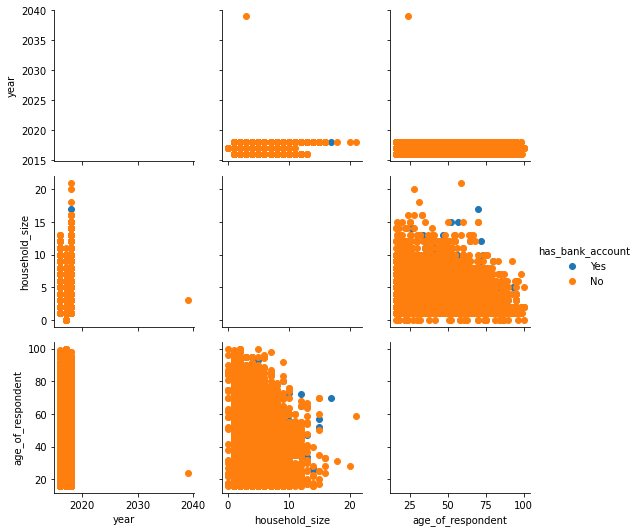

In [103]:
# Pair grid with has account hue

A = sns.PairGrid(df, hue="has_bank_account")
A.map_offdiag(plt.scatter)
A.add_legend()

In [104]:
# Grouping the Numerical data to compare with the has bank account column.

df.groupby(by = 'has_bank_account').agg('mean')[['household_size', 'age_of_respondent']]

,household_size,age_of_respondent
has_bank_account,,
No,3.709639,38.676162
Yes,3.558859,39.605583


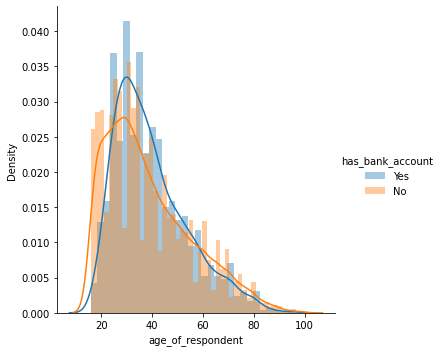

In [105]:
# Checking for the corrrelation between age and having a bank account.

sns.FacetGrid(df, hue = 'has_bank_account', size = 5). map(sns.distplot, "age_of_respondent").add_legend()

The above graph shows that people between age 20 to 40 have opened more bank accounts.

<function matplotlib.pyplot.show(*args, **kw)>

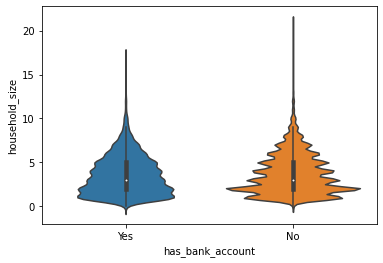

In [106]:
sns.violinplot(x= "has_bank_account", y = "household_size", data = df, size = 6)
plt.show

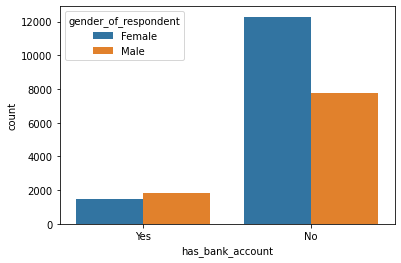

In [107]:
# Comparing Gender and account

#Gender = df['gender_of_respondent'].value_counts()

sns.countplot(data=df, x= 'has_bank_account', hue = 'gender_of_respondent')

In [108]:
# Using data table to display the gender analysis values

total = pd.crosstab(df.gender_of_respondent, df.has_bank_account, margins = True)
total


has_bank_account,No,Yes,All
gender_of_respondent,,,
Female,12286,1480,13766
Male,7758,1816,9574
All,20044,3296,23340


In the above table nad from the graph, we can see that there are more male with bank accounts compared to Female gender. Hence, it seems that the Female gender is less likely to poses bank account as compared to Male gender. This can imply that Females are not so Financially Inclusive.

Text(0.5, 1.0, 'Number of beneficiaries sample per Country')

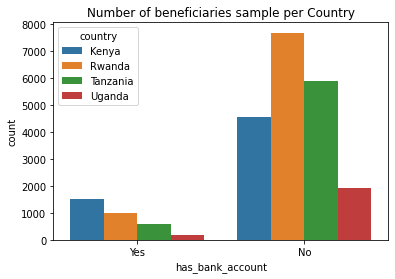

In [109]:
# Comparing Number of beneficiaries sample per Country

sns.countplot(data=df, x= 'has_bank_account', hue = 'country')

plt.title("Number of beneficiaries sample per Country")

Text(0.5, 1.0, 'Comparing Country and  having a bank account')

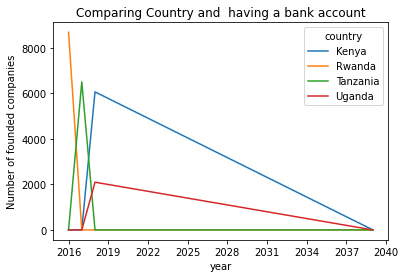

In [110]:
# Comparing Country and  having a bank account

ax = pd.crosstab(df['year'], df['country']).plot.line()
ax.set_ylabel('Number of founded companies')
from matplotlib.ticker import MaxNLocator
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

plt.title("Comparing Country and  having a bank account")


In [111]:
Tyear = pd.crosstab(df.year, df.has_bank_account, margins = True)
Tyear

has_bank_account,No,Yes,All
year,,,
2016,7685,997,8682
2017,5901,599,6500
2018,6457,1700,8157
2039,1,0,1
All,20044,3296,23340


The number of people having bank accounts seem to be increasing accross the years. Though in 2017 the number seemed to have gone down. (We cant determine whether this was due to the low sample size or other factors). 
For this we assume it was due to the low survey number.

In [112]:
Tcountry = pd.crosstab(df.country, df.has_bank_account, margins = True)
Tcountry

has_bank_account,No,Yes,All
country,,,
Kenya,4543,1519,6062
Rwanda,7686,997,8683
Tanzania,5901,599,6500
Uganda,1914,181,2095
All,20044,3296,23340


Text(0.5, 1.0, 'Relationship between location type and having a bank account')

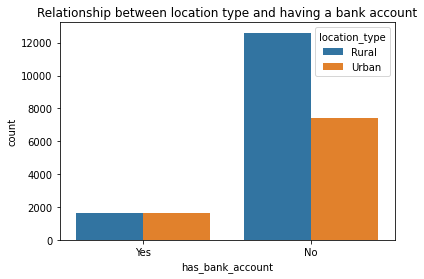

In [113]:
# Comparing Location and  having a bank account

sns.countplot(data=df, x= 'has_bank_account', hue = 'location_type')

plt.title("Relationship between location type and having a bank account")


People in Urban areas are likely to have bank accounts when compared to those in the rural areas.

In [114]:
# Checking the percentage of individuals in different location with bank accounts

Locationall = pd.crosstab(df.location_type, df.has_bank_account, margins = True) ['All']
pd.crosstab(df.location_type, df.has_bank_account). divide (Locationall, axis = 0). dropna()

has_bank_account,No,Yes
location_type,,
Rural,0.883405,0.116595
Urban,0.820095,0.179905


It is evident that a higher percentage of people living in Urban areas **(17.9%)** have bank accounts as compared to those in rural areas **(11.6%)**.

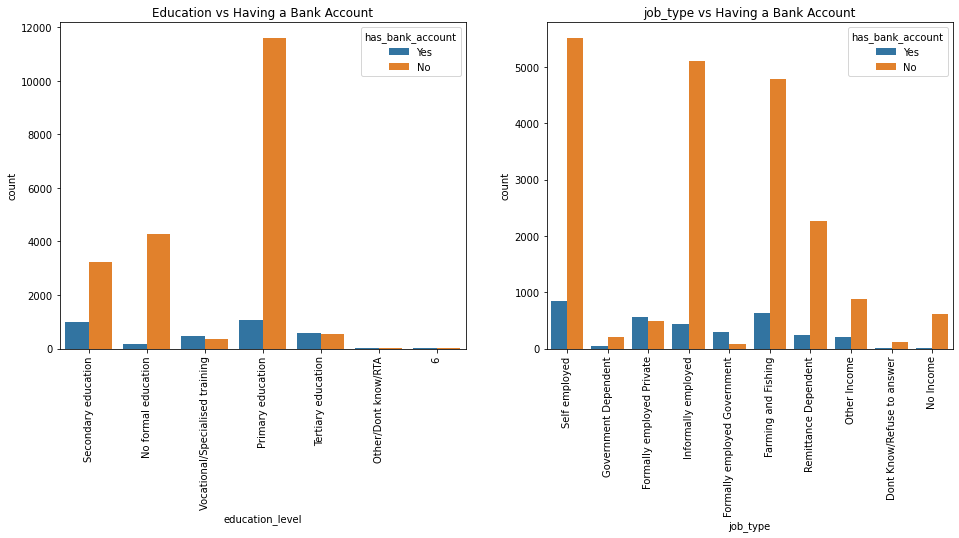

In [115]:
# Comparing education level and occupation vs having a bank account


fig,ax=plt.subplots(1,2,figsize=(16,6))

sns.countplot('education_level',hue='has_bank_account',data=df,ax=ax[0])
ax[0].set_title('Education vs Having a Bank Account')


sns.countplot('job_type',hue='has_bank_account',data=df,ax=ax[1])
ax[1].set_title('job_type vs Having a Bank Account')

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)


plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

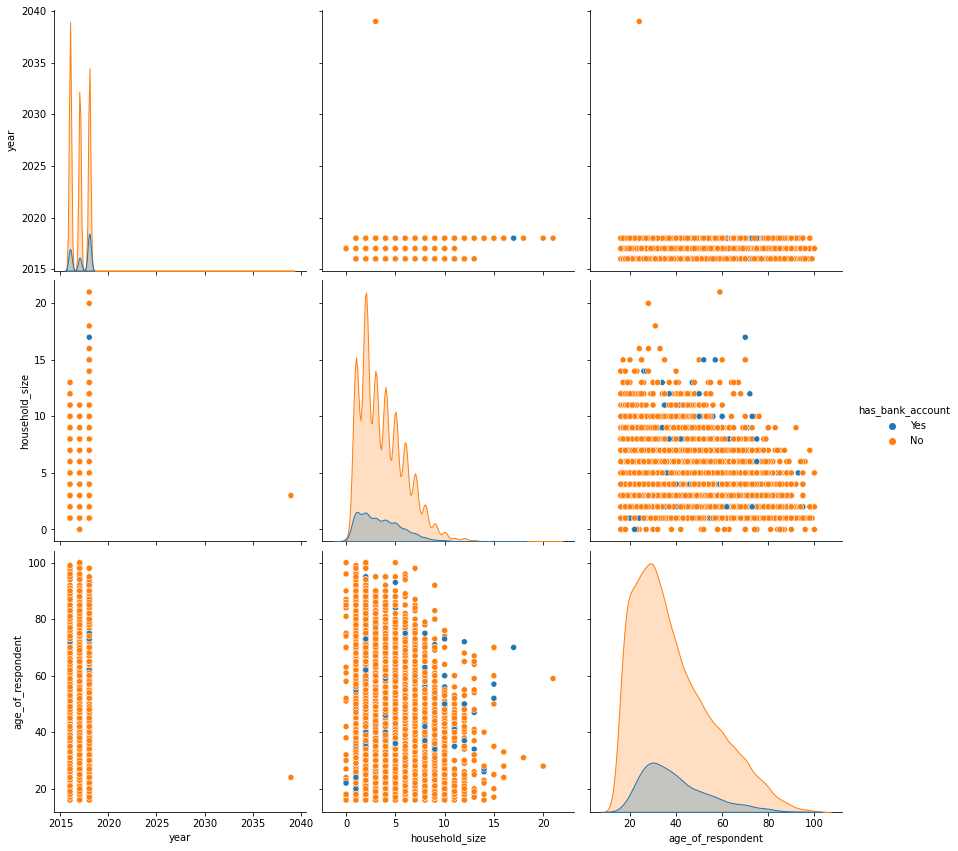

In [116]:
#pairplot

sns.pairplot(df, hue="has_bank_account", size = 4)
plt.show


**MULTIVARIATE ANALYSIS**

Here, we will try to see relations between continuous variables and the ‘Approved’ column. To do that, we will plot a pair plot, with Hue as has_bank_account.

In [117]:
df.columns

Index(['country', 'year', 'uniqueid', 'has_bank_account', 'location_type',
       'cellphone_access', 'household_size', 'age_of_respondent',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type'],
      dtype='object')

In [118]:
# Encoding to change categorical attributes to numeric for futher analysis

encode = {"has_bank_account": {"Yes":1, "No":0}, "gender_of_respondent": {"Male":1, "Female":0},
          "cellphone_access":{"Yes":1,"No":0}, "location_type": {"Rural":1, "Urban":0},
          "country":{"Kenya":0,"Uganda":1, "Tanzania":2, "Rwanda":3},
          "education_level":{"No formal education":0,"Primary education":1, "Secondary education":2,
                              "Vocational/Specialised training":3,"Tertiary education":4, "Other/Dont know/RTA":5},
          "relationship_with_head":{"Head of Household":0, "Child":1, "Parent":2,
                            "Spouse":3, "Other relative":4, "Other non-relatives":5}, 
          "marital_status":{"Married/Living together":0, "Single/Never Married":1, "Divorced/Seperated":2,
                            "Widowed":3, "Dont know":4}}

In [119]:
df.replace(encode, inplace = True)
df.head()

,country,year,uniqueid,has_bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,0,2018,uniqueid_1,1,1,1,3.0,24.0,0,3,0,2,Self employed
1,0,2018,uniqueid_2,0,1,0,5.0,70.0,0,0,3,0,Government Dependent
2,0,2018,uniqueid_3,1,0,1,5.0,26.0,1,4,1,3,Self employed
3,0,2018,uniqueid_4,0,1,1,5.0,34.0,0,0,0,1,Formally employed Private
4,0,2018,uniqueid_5,0,0,0,8.0,26.0,1,1,1,1,Informally employed


In [120]:
df[['country', 'has_bank_account', 'location_type',
       'cellphone_access', 'household_size', 'age_of_respondent',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level']].corr()
 

,country,has_bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status
country,1.000000,-0.147434,0.163660,0.024540,0.008700,0.002443,-0.006896,0.019109,0.046472
has_bank_account,-0.147434,1.000000,-0.088626,0.209484,-0.023019,0.019593,0.116058,-0.094079,-0.083561
location_type,0.163660,-0.088626,1.000000,0.083718,0.274100,0.047632,-0.013158,-0.006501,-0.092132
cellphone_access,0.024540,0.209484,0.083718,1.000000,0.098320,-0.104100,0.102100,-0.050322,-0.166993
household_size,0.008700,-0.023019,0.274100,0.098320,1.000000,-0.119560,0.010149,0.168777,-0.309828
age_of_respondent,0.002443,0.019593,0.047632,-0.104100,-0.119560,1.000000,0.013356,-0.310328,0.235742
gender_of_respondent,-0.006896,0.116058,-0.013158,0.102100,0.010149,0.013356,1.000000,-0.449658,-0.166876
relationship_with_head,0.019109,-0.094079,-0.006501,-0.050322,0.168777,-0.310328,-0.449658,1.000000,-0.244216
marital_status,0.046472,-0.083561,-0.092132,-0.166993,-0.309828,0.235742,-0.166876,-0.244216,1.000000


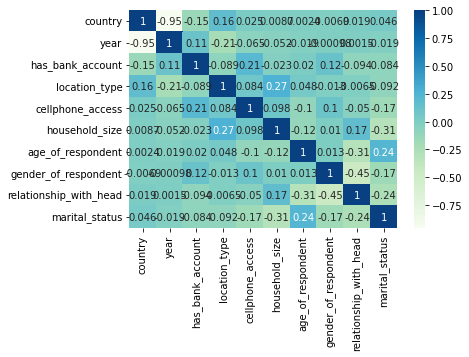

In [121]:
# Plot the correlation heatmap

sns.heatmap(df.corr(), cmap="GnBu", annot=True);

In [122]:
# Dropping unncessary columns

df.drop(['country', 'year','uniqueid','job_type'],axis=1, inplace = True)

**PCA**

In [123]:
# Preprocessing

# The first preprocessing step is to divide the dataset into a feature set and corresponding labels. 
# We can store the feature sets into the X variable 
# and the series of corresponding labels in to the y variable

x = df.drop('has_bank_account',1)
y = df['has_bank_account']

In [124]:
# Splitting the dataset into the Training set and Test set
# we shall define the size of the test data as 20% of entire dataset

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [125]:
# Normalization
 
# We will perform standard scalar normalization to normalize our feature set

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [126]:
# Applying PCA - return all feature since we did not specify
from sklearn.decomposition import PCA

pca = PCA()
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [127]:
# Explained Variance Ratio
# Checking the variance cause by every pc.

explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.22971687, 0.18789736, 0.16999996, 0.11639346, 0.09357951,
       0.080626  , 0.073897  , 0.04788984])

we can say that (22.97 + 18.79) **41.76%** of the classification information contained in the feature set captured by the first 2 principle components


In [132]:
# Using 2 Principal Components to train algorithm and make predictions using random forest classification

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(x_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(x_test)

# Standardization and Scaling
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

pca = PCA(n_components= 2)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(x_train, y_train)

# Performance Evaluation

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))


[[4035    0]
 [ 633    0]]
Accuracy 0.8643958868894601


with this features, the random forest algorithm is able to correctly predict an 86.44% accuracy.

**DISCRIMINANT ANALYSIS**

In [133]:
# Dividing data into training and test sets

x = df.iloc[:,1:].values
y = df.iloc[:,0].values

#using 20% sample size

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Feature Scaling 

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Performing LDA

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=1)
x_train = lda.fit_transform(x_train, y_train)
x_test = lda.transform(x_test)

# Training and Making Predictions

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test) 

# Evaluating Performance

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))



[[3899  136]
 [ 434  199]]
Accuracy 0.877892030848329


Using one component (has bank account) the accouracy is 87.7%

**CONCLUSION AND RECOMMENDATIONS**

***Conclusions & Recommendations from the study Analysis***



1. Individuals at the age range of 20 -40 are more likely to have bak accounts/ open bank acccounts. Financial instituions can therefore use this as their target age to reach to more people.

2. Though most females were sampled. Male gender has been found to be more likely to have bank accounts. Given the high percentage of female in our population and their availability, Financial Instuituions and other interested parties should start focusing and promoting for Women financial empowerment.

3. There is a small signficance difference between persons living in rural vs urban areas in terms of their likelihood to have a bank account.

4. A countries development can affect the financial inclusitivity of its citizen. Uganda has the lowest number of individuals with bank accounts. Of the four surveyed countries, its the least developed.

5. Individuals with Formal and Government jobs are less likely to have bank accounts. 
Self employe people and those formally/ informally employed are most likely to have bank accounts.



***Follow up Question***

The dataset to be more balanced for optimal accuracy in trend prediction (i.e. equal number of entries from different countries).This will enable researcheres to accurately deduce the effect of a Country's development on its popuklation financial inclusitivity.